In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras

In [12]:
df = pd.read_csv("../data/minda-corp.csv")
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,20-February-2020,112.90,116.35,111.70,115.55,115.036203,21849,680,2513426.0,17527.0,80.22,4.65,2.65
1,19-February-2020,113.85,114.40,111.80,112.55,112.595514,6376,383,717909.0,3021.0,47.38,2.60,-1.30
2,18-February-2020,110.95,113.30,107.30,112.00,110.676363,12582,793,1392530.0,4967.0,39.48,6.00,1.05
3,17-February-2020,111.85,115.80,111.05,112.30,113.050234,14751,576,1667604.0,6710.0,45.49,4.75,0.45
4,14-February-2020,116.90,117.00,110.90,111.30,112.957098,12074,1095,1363844.0,4364.0,36.14,6.10,-5.60


In [13]:
df = df.iloc[::-1]
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
1221,23-February-2015,99.00,99.80,93.00,93.00,95.314957,2340,46,223037.0,2140.0,91.45,6.80,-6.00
1220,24-February-2015,97.50,97.50,88.35,94.85,92.268180,2819,114,260104.0,1614.0,57.25,9.15,-2.65
1219,25-February-2015,97.95,97.95,91.00,95.00,94.477243,769,36,72653.0,709.0,92.20,6.95,-2.95
1218,26-February-2015,94.50,94.50,90.25,90.90,91.546419,754,12,69026.0,754.0,100.00,4.25,-3.60
1217,27-February-2015,90.00,95.40,89.25,92.75,91.951327,226,63,20781.0,110.0,48.67,6.15,2.75


In [15]:
close_price = (df["Close Price"].values)

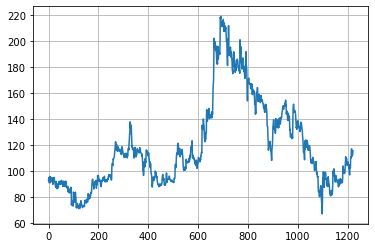

In [16]:
plt.plot(close_price)
plt.grid()

In [22]:
time = np.arange(len(close_price))

In [25]:
split_time = 900

In [26]:
price_train = close_price[:split_time]
time_train = time[:split_time]

price_valid = close_price[split_time:]
time_valid = time[split_time:]

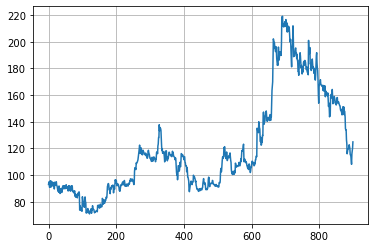

In [28]:
plt.plot(time_train,price_train)
plt.grid()

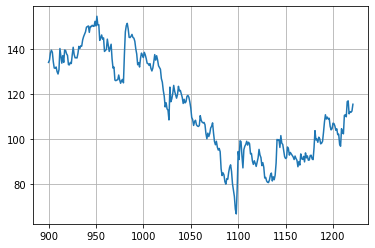

In [30]:
plt.plot(time_valid,price_valid)
plt.grid()

## Naive Forcasting

In [31]:
naive_f = close_price[split_time-1:-1]

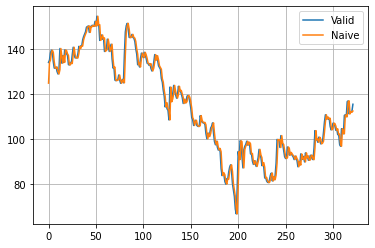

In [33]:
plt.plot(price_valid)
plt.plot(naive_f)
plt.legend(["Valid","Naive"])
plt.grid()

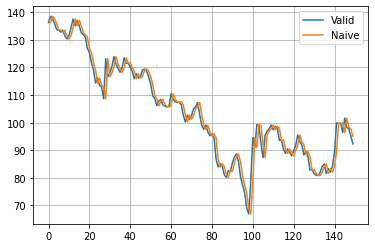

In [34]:
plt.plot(price_valid[100:250])
plt.plot(naive_f[100:250])
plt.legend(["Valid","Naive"])
plt.grid()

In [37]:
print(keras.metrics.mean_squared_error(price_valid,naive_f).numpy())

10.569138


In [38]:
print(keras.metrics.mean_absolute_error(price_valid,naive_f).numpy())

2.3197205


## Moving Average

In [58]:
def moving_average(series,window_size):
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time+window_size].mean())

    return np.array(forecast)

In [61]:
m_a_valid = moving_average(close_price,30)[split_time - 30: ]

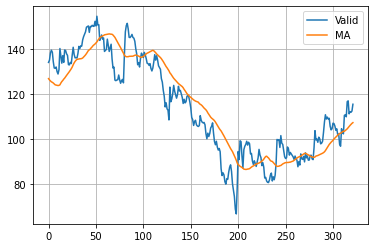

In [63]:
plt.plot(price_valid)
plt.plot(m_a_valid)
plt.legend(["Valid","MA"])
plt.grid()


In [66]:
print(keras.metrics.mean_squared_error(m_a_valid,naive_f).numpy())
print(keras.metrics.mean_absolute_error(m_a_valid,naive_f).numpy())

71.25739
6.994565


### Differencing

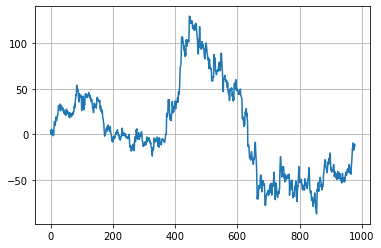

In [65]:
diff = (close_price[243:] - close_price[:-243])
plt.plot(diff)
plt.grid()

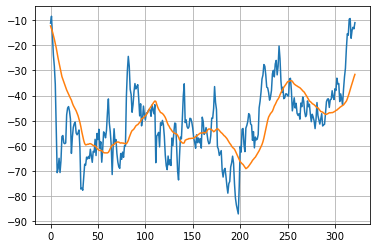

In [68]:
m_a_valid_diff = moving_average(diff,30)[split_time - 30 - 243: ]
plt.plot(diff[split_time - 243:])
plt.plot(m_a_valid_diff)
plt.grid()


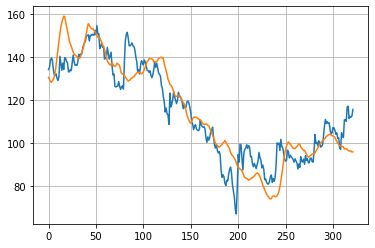

In [73]:
total_m_a = m_a_valid_diff + moving_average(close_price[split_time - 243 -10 : -243 ],10)
plt.plot(price_valid)
plt.plot(total_m_a)
plt.grid()


In [74]:
print(keras.metrics.mean_absolute_error(price_valid,total_m_a).numpy())
print(keras.metrics.mean_squared_error(price_valid,total_m_a).numpy())

7.281143
88.80325
